# 教程 0：LAT Workshop的基本介绍材料

本教程中将对Python进行基本概述，它对理解和使用在LISA Analysis Tools环境中开发的代码非常重要，还会介绍教程的架构方式。
在开课前完成python并确保环境安装成功。

* 任务:教程中的任务将指导你使用教程中提到的方法，并将教程分成几个模块。
* 问题:在较大的任务中会给出附加问题，可能涉及或不涉及编程，有些不涉及。大部分需要讨论。
* 结构:根据手头的任务，我们将提供有助于完成任务的具体说明、少量代码和文档，用户应该自主完成大部分或全部实际编程使notebook成功运行。注意:在许多情况下，特定代码库中的教程可以让你接近正确的解答。需要浏览它们找到有用的回答。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful
from lisatools.utils.constants import *

## 任务 1:构建并初始化一个类对象.

类是构建LISA分析工具及相关代码的基本对象。理解和使用类将增强对于LISA分析工具的理解和能力。

构建一个拥有`__init__`和`get_wave`两种函数的类对象:

`__init__`：存储频率，幅度和初始相位。

`get_wave`：输入一个时间数组作为参数，然后使用存储在self和时间数组中的频率、幅度和初始相位，最后返回一个正弦函数结果。

In [21]:
class Waveform:
    def __init__(self, A, f, phi):
        self.A = A
        self.f = f
        self.phi = phi

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi)

提供必要的参数实例化类。为时间数组构建numpy数组并测试类的输出。

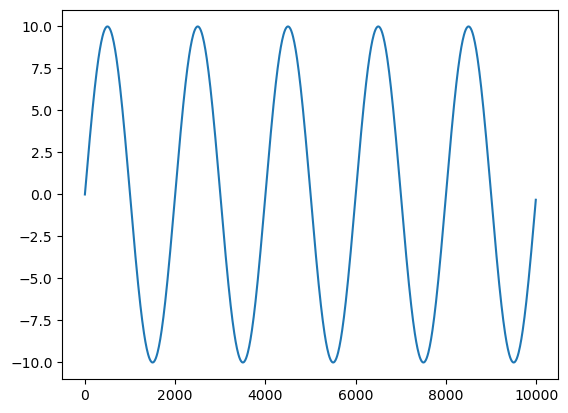

In [22]:
t_arr = np.arange(0.0, 10000.0, 10.0)

wave = Waveform(10, 0.5e-3, 0)

y = wave.get_wave(t_arr)

plt.plot(t_arr, y)

## 任务 2: `*args` 和 `**kwargs`

使用lisatools的另一个重要部分是`*args`和`**kwargs`。下面将通过几种方式对不定传参(`*args`)和关键字参数(`**kwargs`)进行实验。

设计一个函数，能够接受不定数量的参数并打印它们出来。函数签名是`fun(*args)`。在这个条件下，args将是一个可迭代对象，所以可以使用for循环遍历参数。

In [3]:
def func(*args):
    for i in args:
        print(i)

func(2,3,4,'a')

2
3
4
a


在函数签名中添加一些参数，位于`*args`前面，观察结果的变化情况。

In [4]:
def func(a, b, *args):
    for i in args:
        print(i)

func(2,3,4,'a')

4
a


思考：
运行的其他函数会输入到*args前的参数里，而不会在循环中打印输出。

对`func(**kwargs)`进行同样的操作。产生一个字典，在for循环中打印输出。

In [7]:
def func(**kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(a=1978, b="Hello, world!", c=1.0988)

a 1978
b Hello, world!
c 1.0988


在函数可变时，`**kwargs`非常有用，因为可以让它输出字典中所需的特定元素，并把其他的内容都存储在`**kwargs`产生的字典中。将关键字参数添加到函数签名中并观察它是怎么改变打印结果的。

In [13]:
def func(a=1978, b=1, **kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(a=1978, b="Hello, world!", c=1.0988)#前面两个关键字参数没有输出，只输出了存进字典的

c 1.0988


还可以反向操作。用`*args`在函数调用中输入一个可迭代的对象，`*args`可以把它扩展到函数签名中。生成能调用2个参数的函数，然后创建一个包含2个元素的列表。使用`*list`将其输入到函数调用中，并在函数中打印输出。

In [26]:
def func(x, y):
    print(x, y)

x = [1, 2]
func(*x)#x包含的元素个数只能和函数允许调用的一样多，不能多不能少

1 2


这个操作也适用于`**kwargs`和任何其他字典，如`**dict`。如上述对`**kwargs`进行相同的操作。

In [21]:
def func(x=1, y=1, z=1):
    print(x, y, z)

in_dict = {"x": 1.0, "y": 10, "z": " :) "}
func(**in_dict)

in_dict = {"y": "hello"}
func(**in_dict)#可以任意替换字典中的元素

1.0 10  :) 
1 hello 1


## 任务 3: 类继承

类继承理解起来比较复杂。对于本课程来说，了解这些并不是必要的，但对于理解LISA Analysis Tools和其他为未来的开发维护而设计的抽象代码库有所帮助。

从上面复制构建好的类。在 `__init__`函数中添加一个关键字参数，这个参数是正弦函数的纵向偏置值（浮点数），从0开始增加。将其存储到`self`中。在 `get_wave` 函数中把它添加到正弦波返回值的末尾。

**注意**:请确保输入$A$的任何值和这个附加的偏置系数相差的数量级不太大。否则可能会遇到系统精度问题。

In [23]:
class Waveform:
    def __init__(self, A, f, phi, x=1.0):
        self.A = A
        self.f = f
        self.phi = phi
        self.x = 1.0

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi) + self.x#返回正弦波之后返回关键字参数

创建一个继承上面的类的类，在运算过程中调整其输出。这个类应该增加两个函数:

`__init__` 接受一个代表乘法因子（浮点数）的单参，并存储在 `self `中。在函数签名中增加不定传参和关键字参数，让函数更加灵活化。通过下面一行代码把这些参数传递给父类：
```
super(ChildClass, self).__init__(*args, **kwargs)
```

` __call__` 允许用户初始化一个类，并作为函数或可调用类传递。换句话说： `c = Class()` -> `y = c(x)`，而不必像`get_wave`命名一个特定的方法。

` __call__ `接收一个参数，即时间数组（numpy 数组），将其放入 `get_wave` 。再把` get_wave` 的输出乘以存储的乘法因子后返回结果。

In [24]:
class ChildClass(Waveform):
    def __init__(self, multiplicative_factor, *args, **kwargs):
        self.multiplicative_factor = multiplicative_factor

        # 把子类函数的引入的参数传递给父类
        super(ChildClass, self).__init__(*args, **kwargs)

    def __call__(self, t_arr):
        y = self.get_wave(t_arr)
        return y * self.multiplicative_factor

初始化并测试类。

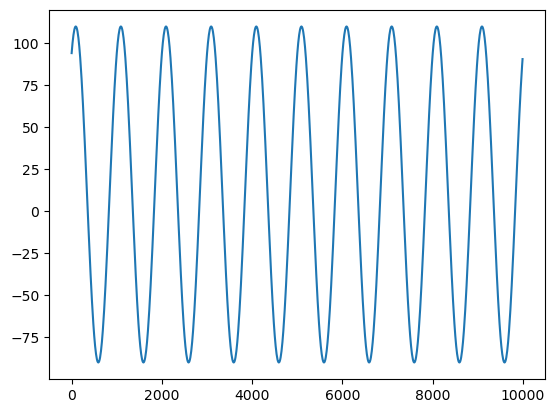

In [50]:
check = ChildClass(10.0, 10, 1e-3, 1, x=1.0)
plt.plot(t_arr, check(t_arr))

## 学习总结：

在这个准备章节中主要介绍了一些基本的python编程知识，主要是构建类，使用不同类型的参数构建函数，还有类继承的知识。这些知识我在以往的编程学习中也有所了解。这里主要是为后续的引力波学习做一个提前准备，如构建一个包含了引力波基本信息和处理函数的类，并且体验不定传参和关键字参数的编码和输出方法。

在开始，我们构建了一个正弦波生成器类，包含了生成正弦波的一些基本信息，然后实例化并绘制了图像。这让我了解了怎么描述一个波动，以及在python中建立一个类的方法和需要的元素（参数，函数等等）。

接下来是一些对不定传参和关键字参数的运用。不定传参是一维的，可以作为一个列表存储，输入或输出；关键字参数是二维的，将信息存储在字典中，通过key->val的对应可以找到我们需要的内容。通过使用这两种参数，可以让我们的类更加灵活，能够调用的参数数量可变的。

最后是一些类继承的知识，子类继承父类的函数和参数，同时可以增加新的使用方式的函数，并且把参数重新传递给父类，这使我们可以进行更丰富的操作，同时对父类和子类有模块化的区分。